In [1]:
# Inflation

In [2]:
# https://www.destatis.de/DE/Themen/Wirtschaft/Konjunkturindikatoren/Basisdaten/pre210a.html?view=main[Print]

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import os
from datetime import datetime
from datetime import date  # todays date
from matplotlib.ticker import FuncFormatter

In [4]:
# import

In [5]:
pfad = str(os.path.abspath(os.getcwd()))+ "\\"
size = 30
today = date.today().strftime("%d.%m.%Y")
titel0 = 'Inflation'
indexart = 'Erzeugerpreisindex'
print(pfad)

D:\Github\Aktien\Inflation\


In [6]:
df = pd.read_excel(pfad+"Input_Erzeugerpreise.xlsx")
df

,Datum,Gesamt,Vorleistungsgüter,Investitionsgüter,Gebrauchsgüter,Verbrauchsgüter,Energie
0,2022-06-01,148.4,141.7,115.1,120.3,124.9,211.2
1,2022-05-01,147.5,142.5,114.6,118.9,124.0,207.9
2,2022-04-01,145.2,140.4,114.0,117.6,122.4,202.8
3,2022-03-01,141.2,134.9,112.7,116.2,117.8,197.9
4,2022-02-01,134.6,130.3,112.2,115.3,114.5,179.3
...,...,...,...,...,...,...,...
61,2017-05-01,100.8,102.4,101.7,102.2,103.8,95.7
62,2017-04-01,100.9,102.5,101.6,102.1,103.3,96.3
63,2017-03-01,100.6,102.1,101.5,102.0,102.7,96.1
64,2017-02-01,100.5,101.3,101.4,101.9,102.6,96.7


In [7]:
print(df.columns)

Index(['Datum', 'Gesamt', 'Vorleistungsgüter', 'Investitionsgüter',
       'Gebrauchsgüter', 'Verbrauchsgüter', 'Energie'],
      dtype='object')


In [9]:
df = pd.read_excel(pfad+"Input_Erzeugerpreise.xlsx")
# df.rename(columns = {
#     'Gesamt':'Gesamt', 
#     'Nahrungsmittel (01)':'Nahrung',
#     'Alkohol, Tabak (02)':'Alkohol_Tabak',
#     'Kleidung (03)':'Kleidung',
#     'Wohnung, Wasser, Strom, Gas, Brennstoffe (04)':'Wohnen',
#     'Möbel, Haushaltsgeräte (05)':'Haushalt',
#     'Gesundheit (06)':'Gesundheit',
#     'Verkehr (07)':'Verkehr',
#     'Post, Telekommunikation (08)':'Post_Internet',
#     'Freizeit, Unterhaltung, Kultur (09)':'Freizeit',
#     'Bildung (10)':'Bildung',
#     'Gaststätten, Beherbergung, Dienstleistungen (11)':'Gastgewerbe',
#     'Andere Waren, Dienstleistungen (12)':'andere_Waren_Dienstleistungen'}, 
#     inplace = True)
df.head(2)

,Datum,Gesamt,Vorleistungsgüter,Investitionsgüter,Gebrauchsgüter,Verbrauchsgüter,Energie
0,2022-06-01,148.4,141.7,115.1,120.3,124.9,211.2
1,2022-05-01,147.5,142.5,114.6,118.9,124.0,207.9


In [72]:
# # Iterate over two given columns only from the dataframe
# for column in df[['Nahrung', 'Alkohol_Tabak', 'Kleidung', 
#                   'Wohnen', 'Haushalt', 'Gesundheit', 'Verkehr', 
#                   'Post_Internet', 'Freizeit', 'Bildung', 'Gastgewerbe', 'andere_Waren_Dienstleistungen']]:
#     print(column)
#     df[f'{column}2'] = df['Gesamt'] - df[f'{column}']

Nahrung
Alkohol_Tabak
Kleidung
Wohnen
Haushalt
Gesundheit
Verkehr
Post_Internet
Freizeit
Bildung
Gastgewerbe
andere_Waren_Dienstleistungen


In [10]:
df.head(2)

,Datum,Gesamt,Vorleistungsgüter,Investitionsgüter,Gebrauchsgüter,Verbrauchsgüter,Energie
0,2022-06-01,148.4,141.7,115.1,120.3,124.9,211.2
1,2022-05-01,147.5,142.5,114.6,118.9,124.0,207.9


In [11]:
df.columns

Index(['Datum', 'Gesamt', 'Vorleistungsgüter', 'Investitionsgüter',
       'Gebrauchsgüter', 'Verbrauchsgüter', 'Energie'],
      dtype='object')

Gesamt
Vorleistungsgüter
Investitionsgüter
Gebrauchsgüter
Verbrauchsgüter
Energie


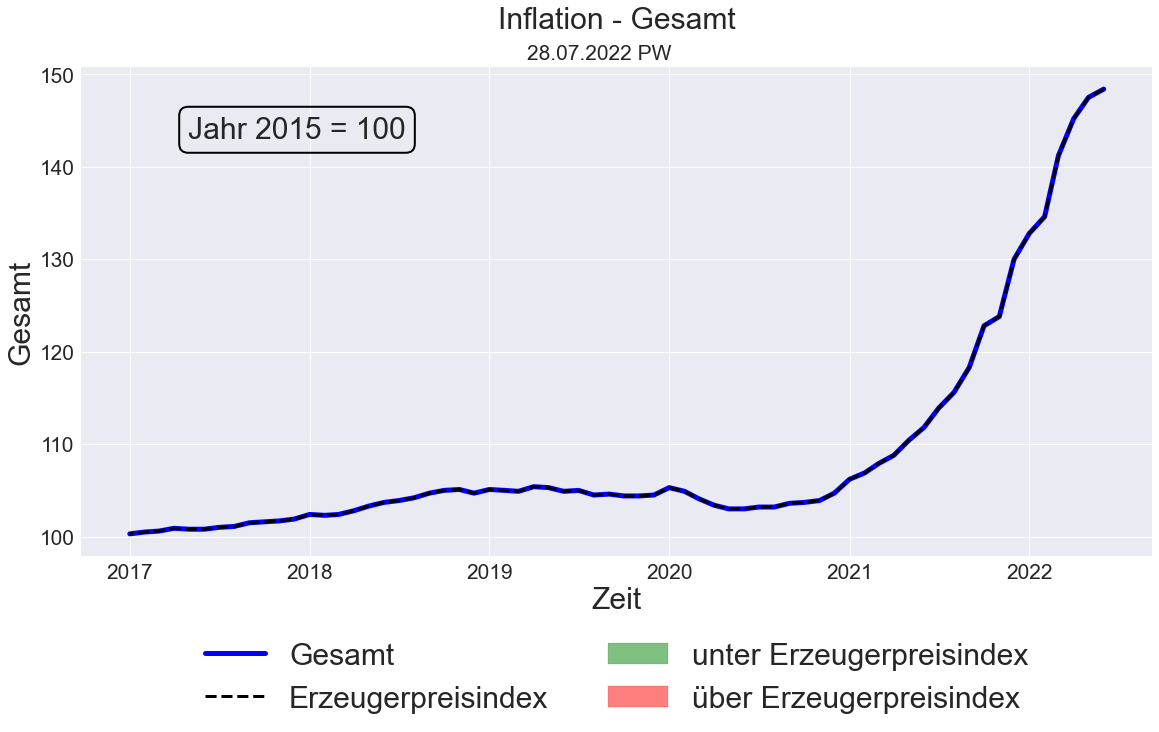

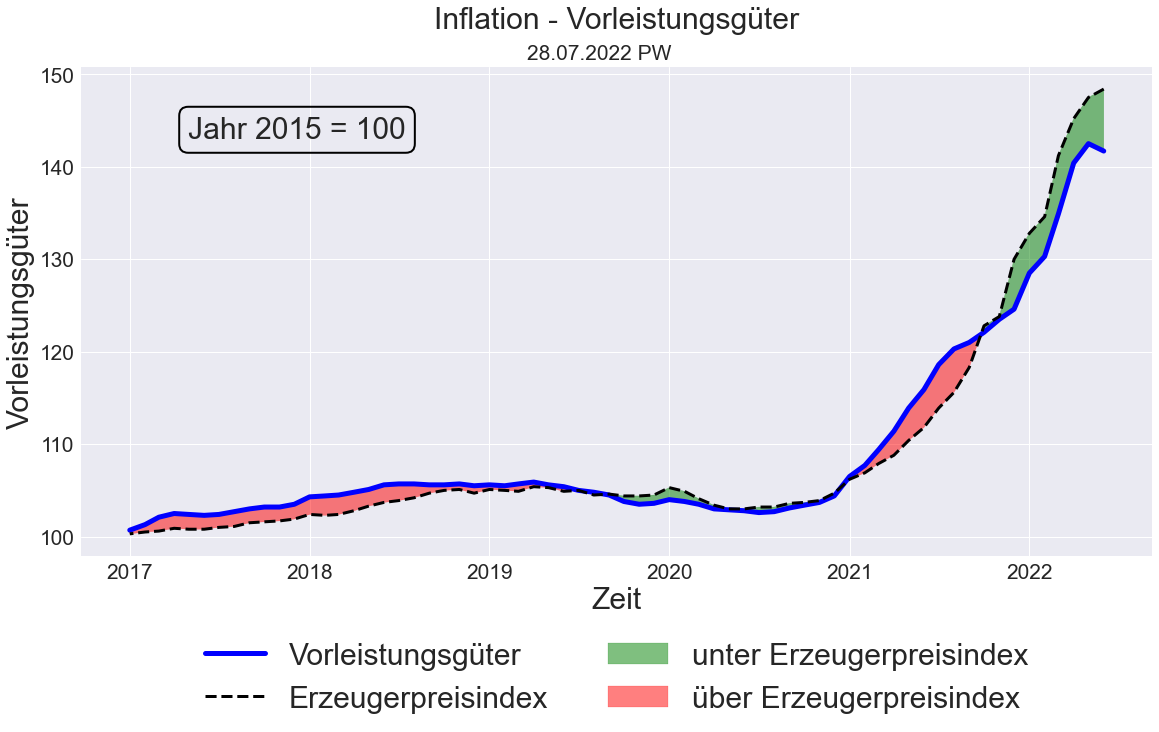

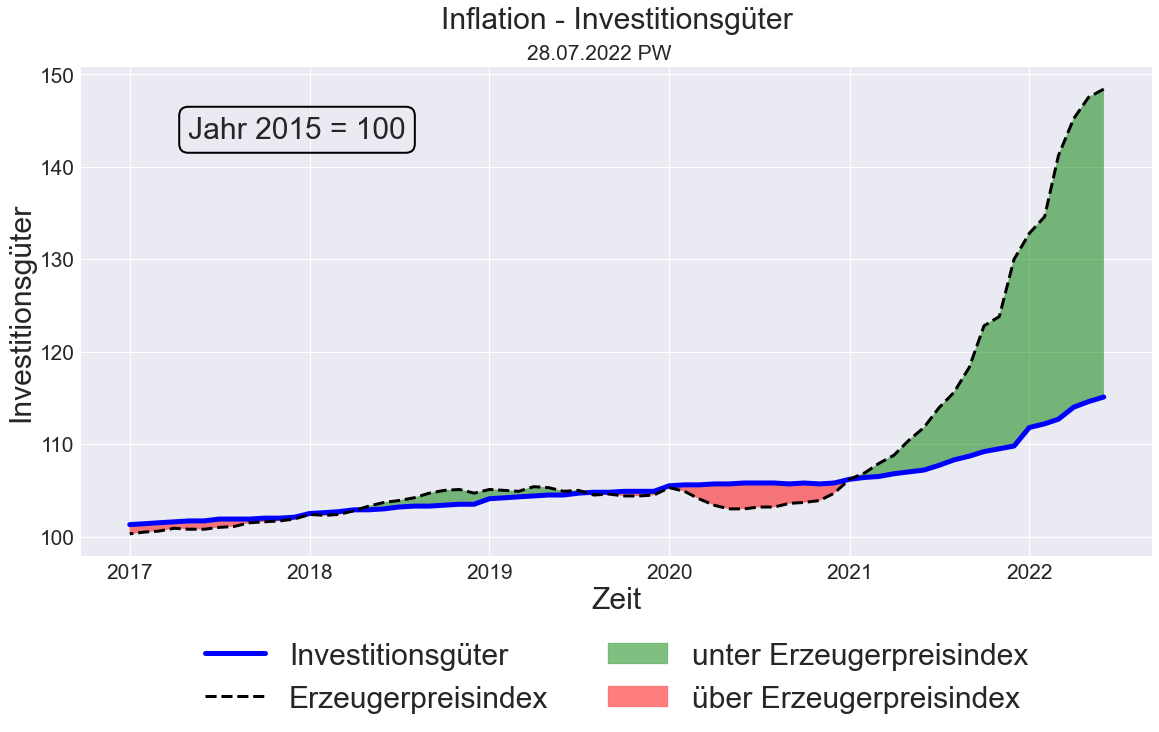

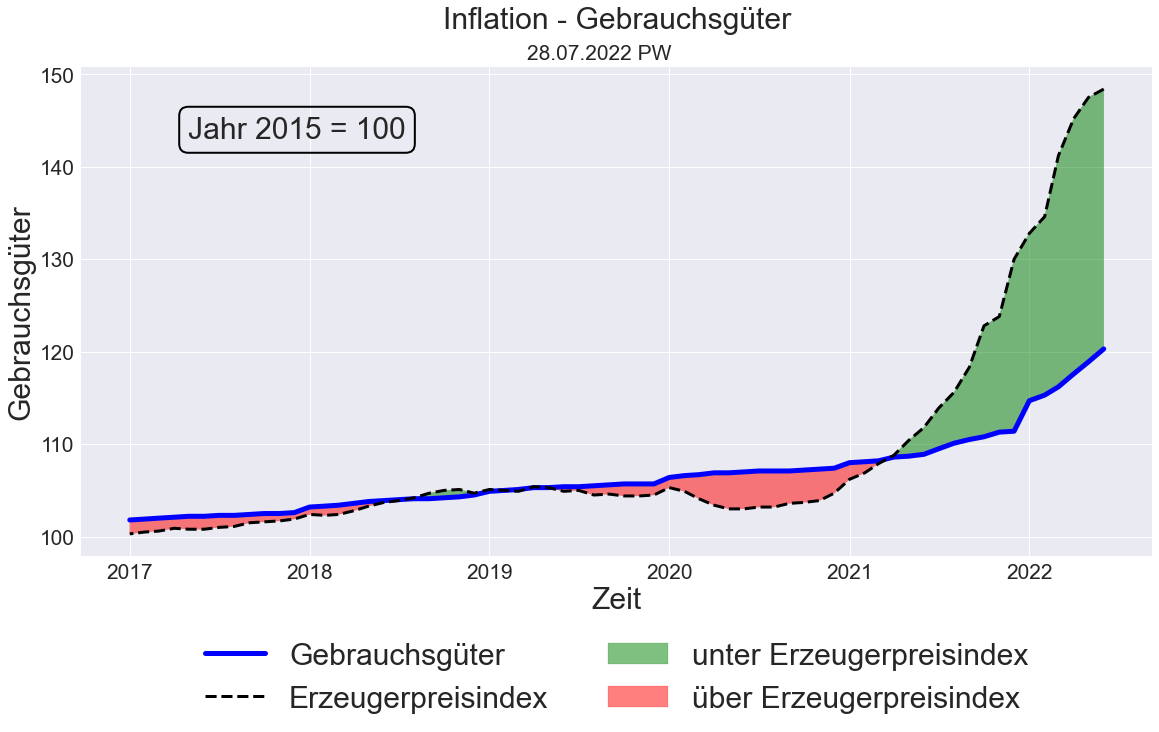

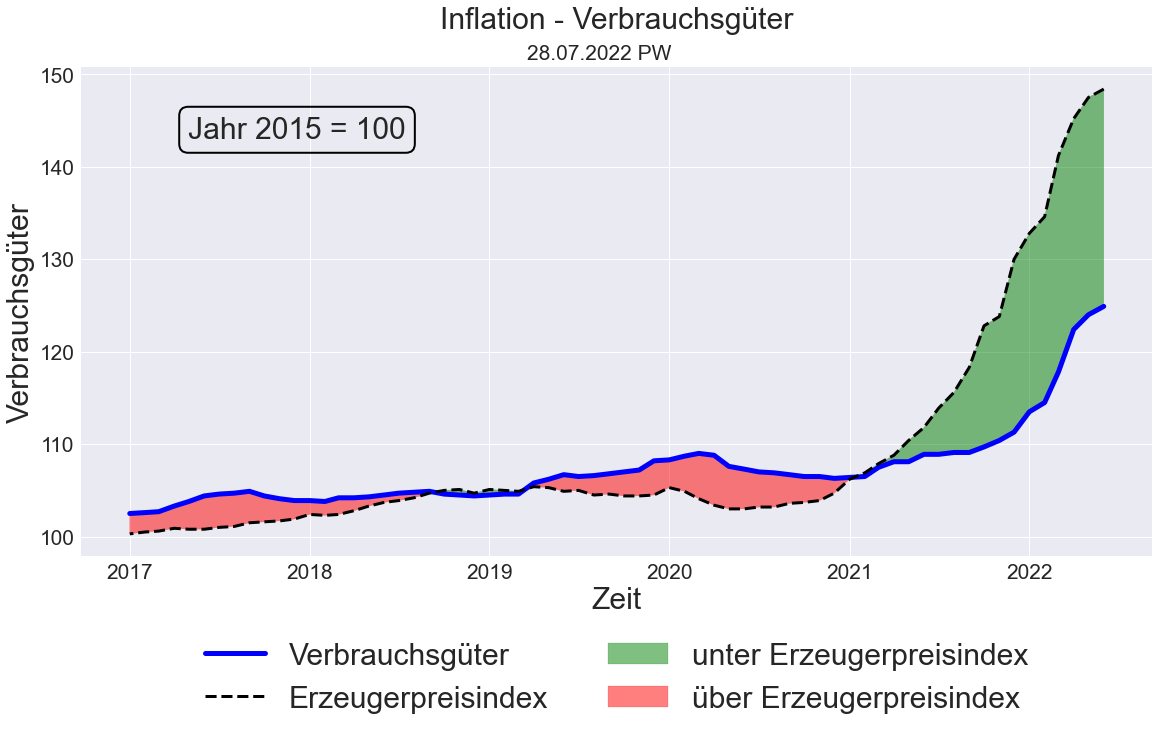

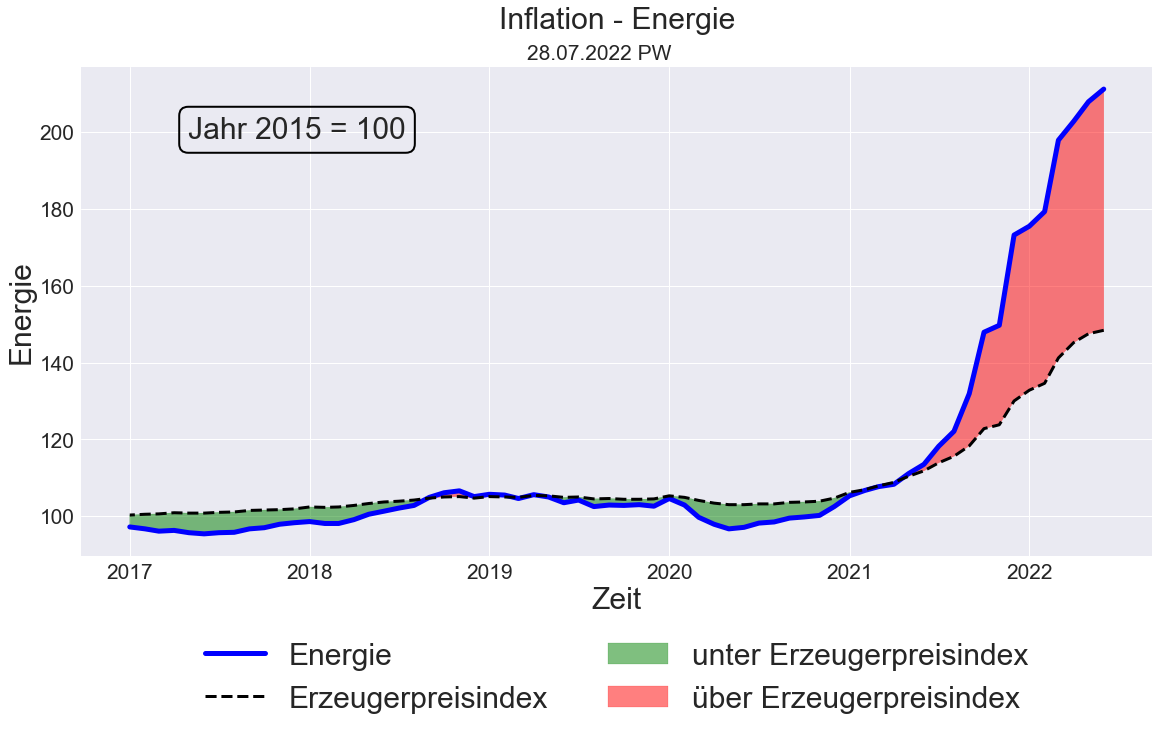

In [12]:
for column in df[['Gesamt','Vorleistungsgüter', 'Investitionsgüter', 'Gebrauchsgüter', 
                  'Verbrauchsgüter', 'Energie']]:
    title = column
    print(column)
    # print(df[column])

    def y_axis_thousands(x, pos):
        # 'The two args are the value and tick position'
        return '{:0,d}'.format(int(x)).replace(",", ".")

    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(16*1.2, 9))
    formatter = FuncFormatter(y_axis_thousands)
    ax.yaxis.set_major_formatter(formatter)
    plt.grid(True)


    plt.plot(df.Datum, df[f'{title}'], marker='', linestyle='-',
             color="blue", linewidth=5, markersize=5, label=title)
    
    plt.plot(df.Datum, df['Gesamt'], marker='', linestyle='--',
             color="black", linewidth=3, label=indexart, markersize=5)
    
    plt.fill_between(df.Datum, df['Gesamt'], df[f'{title}'], color='green', alpha=0.5,
                    label='unter Erzeugerpreisindex', interpolate=True,
                    where = df['Gesamt'] > df[f'{title}'])
    
    plt.fill_between(df.Datum, df['Gesamt'], df[f'{title}'], color='red', alpha=0.5,
                    label='über Erzeugerpreisindex', interpolate=True,
                    where = df['Gesamt'] < df[f'{title}'])
    
    plt.legend(loc='upper center',
               bbox_to_anchor=(0.5, -0.12),
               fancybox=True,
               shadow=True,
               ncol=2,
               fontsize=size * 1)

    plt.xticks(fontsize=size * 0.7, rotation=0)
    plt.yticks(fontsize=size * 0.7, rotation=0)

    plt.ylabel(title, fontsize=size * 1)
    plt.xlabel('Zeit', fontsize=size * 1)

    plt.title(f'{titel0} - {title}\n', fontsize=size * 1)
    plt.suptitle(f'{today} PW', fontsize=size * 0.7, y=0.915)

    ax.text(0.10, 0.9, "Jahr 2015 = 100", transform=ax.transAxes, fontsize=size, verticalalignment='top',
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3', lw=2))

    # Diagramm als Bild exporieren und Auflösung definieren  
    plt.savefig(f'{pfad}{indexart} {title}.png', dpi=300, bbox_inches='tight')